# Outlier detection test
Reference: https://qiita.com/cvusk/items/9c8a52d4248f31406900

In [1]:
# Import libraries

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Use iris data

iris_data = load_iris()
# print(iris_data.data[:5])
# print(iris_data.target[:5])
# print(iris_data['target_names'])

df_iris_data   = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
df_iris_target = pd.DataFrame(iris_data.target)
df_iris_target = df_iris_target.replace({0 : iris_data['target_names'][0],
                                         1 : iris_data['target_names'][1],
                                         2 : iris_data['target_names'][2]})

df_iris_data['target'] = df_iris_target
print(df_iris_data.shape)
df_iris_data.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


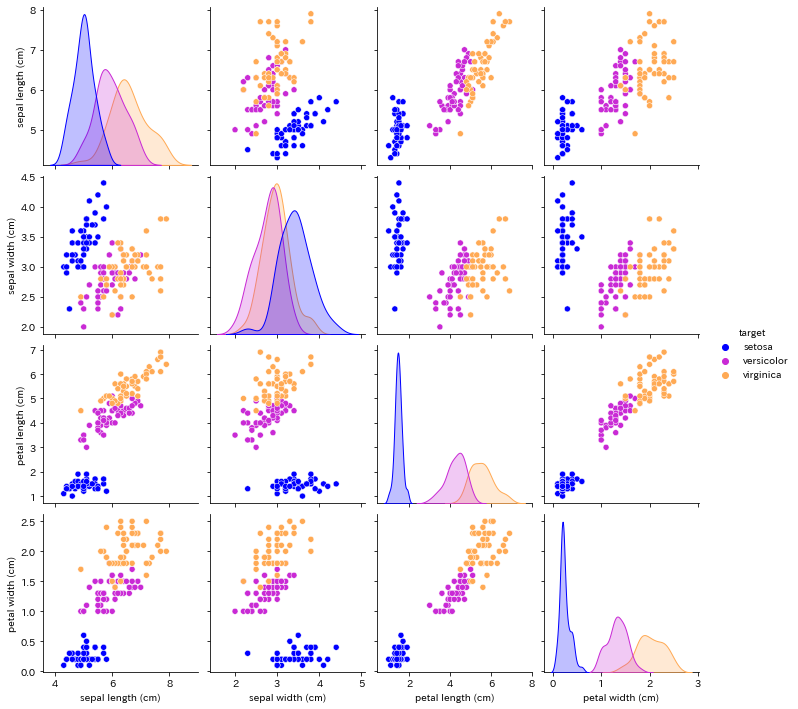

In [4]:
sns.pairplot(df_iris_data, hue = 'target', palette = 'gnuplot2')
plt.show()

data size =  (50, 2)


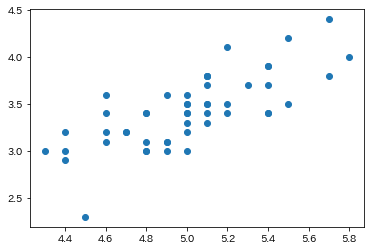

In [5]:
# Select the 1st and 2nd columns of the 'Setosa' data only

df_test = df_iris_data[df_iris_data['target'] == 'setosa']
data = df_test.iloc[:, 0:2]
print('data size = ', data.shape)

plt.scatter(df_test.iloc[:, 0], df_test.iloc[:, 1])
plt.show()

## Begin analysis

In [6]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [7]:
outliers_fraction = 0.05
random_state = np.random.RandomState(111)

Outlier index =  [14, 15, 41]


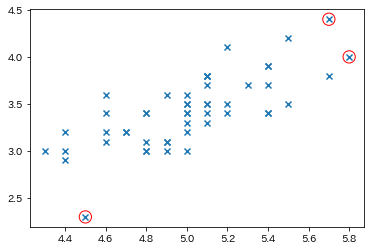

In [8]:
clf = EllipticEnvelope(contamination = outliers_fraction)
clf.fit(data)

pred = clf.predict(data)
outlier_idx = [i for i in range(len(pred)) if pred[i] == -1]
print('Outlier index = ' , outlier_idx)

plt.scatter(df_test.iloc[:, 0], df_test.iloc[:, 1], marker = 'x')
for i in outlier_idx:
    plt.scatter(df_test.iloc[i, 0], df_test.iloc[i, 1], c = 'None', s = 150, edgecolors = 'r')
    
plt.show()

Outlier index =  [14, 15, 41]


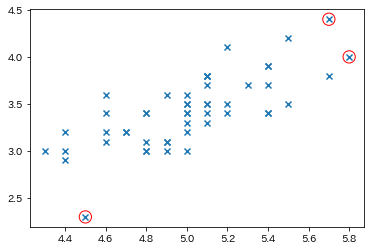

In [9]:
clf = IsolationForest(contamination = outliers_fraction, max_samples = 'auto', random_state = random_state, n_estimators = 50)
clf.fit(data)

pred = clf.predict(data)
outlier_idx = [i for i in range(len(pred)) if pred[i] == -1]
print('Outlier index = ' , outlier_idx)

plt.scatter(df_test.iloc[:, 0], df_test.iloc[:, 1], marker = 'x')
for i in outlier_idx:
    plt.scatter(df_test.iloc[i, 0], df_test.iloc[i, 1], c = 'None', s = 150, edgecolors = 'r')
    
plt.show()

Outlier index =  [13, 15, 41]


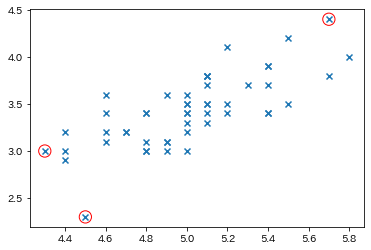

In [10]:
clf = OneClassSVM(nu = outliers_fraction, kernel = 'rbf', gamma = 0.03)
clf.fit(data)

pred = clf.predict(data)
outlier_idx = [i for i in range(len(pred)) if pred[i]==-1]
print('Outlier index = ' , outlier_idx)

plt.scatter(df_test.iloc[:, 0], df_test.iloc[:, 1], marker = 'x')
for i in outlier_idx:
    plt.scatter(df_test.iloc[i, 0], df_test.iloc[i, 1], c = 'None', s = 150, edgecolors = 'r')
    
plt.show()

Outlier index =  [15, 41]


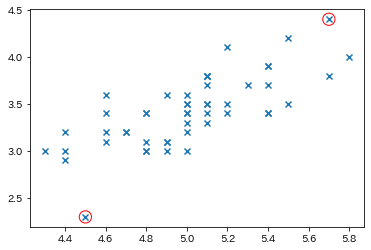

In [11]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = outliers_fraction, novelty = True)
clf.fit(data)

pred = clf.predict(data)
outlier_idx = [i for i in range(len(pred)) if pred[i] == -1]
print('Outlier index = ' , outlier_idx)

plt.scatter(df_test.iloc[:, 0], df_test.iloc[:, 1], marker = 'x')
for i in outlier_idx:
    plt.scatter(df_test.iloc[i, 0], df_test.iloc[i, 1], c = 'None', s = 150, edgecolors = 'r')
    
plt.show()

## Acoording to the methods, results change, so change both outlier threshold and method so that we can find outliers in high probability regardless of algorithms.

In [12]:
# Change the outliers_fraction values and see the difference in the results by methods

def perform_EllipticEnvelope(outliers_fraction):
    clf = EllipticEnvelope(contamination = outliers_fraction)
    clf.fit(data)
    pred = clf.predict(data)
    outlier_idx = [i for i in range(len(pred)) if pred[i] == -1]
    return outlier_idx
    
def perform_IsolationForest(outliers_fraction):
    clf = IsolationForest(contamination = outliers_fraction, max_samples = 'auto', random_state = random_state, n_estimators = 50)
    clf.fit(data)
    pred = clf.predict(data)
    outlier_idx = [i for i in range(len(pred)) if pred[i] == -1]
    return outlier_idx

def perform_OneClassSVM(outliers_fraction):
    clf = OneClassSVM(nu = outliers_fraction, kernel = 'rbf', gamma = 0.03)
    clf.fit(data)
    pred = clf.predict(data)
    outlier_idx = [i for i in range(len(pred)) if pred[i]==-1]
    return outlier_idx

def perform_LocalOutlierFactor(outliers_fraction):
    clf = LocalOutlierFactor(n_neighbors = 20, contamination = outliers_fraction, novelty = True)
    clf.fit(data)
    pred = clf.predict(data)
    outlier_idx = [i for i in range(len(pred)) if pred[i] == -1]
    return outlier_idx

In [13]:
# Set the range of outlirs fraction

min_outliers_fraction = 0.01
max_outliers_fraction = 0.1
step = 0.005

In [14]:
# Functions to make intensity matrix of outlier fraction and outlier index

outliers_fraction_list = np.arange(min_outliers_fraction, max_outliers_fraction, step)

outlier_idx_EE = np.zeros((len(outliers_fraction_list), len(data)))
outlier_idx_IF = np.zeros((len(outliers_fraction_list), len(data)))
outlier_idx_OC = np.zeros((len(outliers_fraction_list), len(data)))
outlier_idx_LO = np.zeros((len(outliers_fraction_list), len(data)))

for i in range(len(outliers_fraction_list)):
    idx = perform_EllipticEnvelope(outliers_fraction_list[i])
    for idx_num in idx:
        outlier_idx_EE[i, idx_num] = 1
        
for i in range(len(outliers_fraction_list)):
    idx =  perform_IsolationForest(outliers_fraction_list[i])
    for idx_num in idx:
        outlier_idx_IF[i, idx_num] = 1
        
for i in range(len(outliers_fraction_list)):
    idx = perform_OneClassSVM(outliers_fraction_list[i])
    for idx_num in idx:
        outlier_idx_OC[i, idx_num] = 1
        
for i in range(len(outliers_fraction_list)):
    idx =  perform_LocalOutlierFactor(outliers_fraction_list[i])
    for idx_num in idx:
        outlier_idx_LO[i, idx_num] = 1

acc_sol = outlier_idx_EE + outlier_idx_IF + outlier_idx_OC + outlier_idx_LO

In [15]:
# Make Pandas dataframe from intensity matrix of outlier fraction and outlier index

df_acc_sol = pd.DataFrame(acc_sol)
df_acc_sol.index = list(np.round(outliers_fraction_list, decimals = 3))
df_acc_sol = df_acc_sol.T
df_acc_sol.columns.astype(str)
df_acc_sol.head()

,0.010,0.015,0.020,0.025,0.030,0.035,0.040,0.045,0.050,0.055,0.060,0.065,0.070,0.075,0.080,0.085,0.090,0.095
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


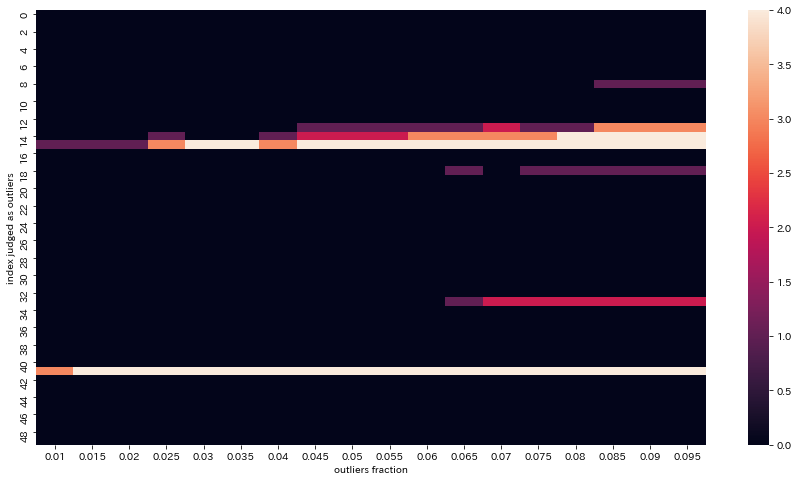

In [16]:
# Draw intensity heatmap : brighter index means outliers regardless of methods

fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(data = df_acc_sol)
ax.set(xlabel = 'outliers fraction', ylabel = 'index judged as outliers')
plt.show()

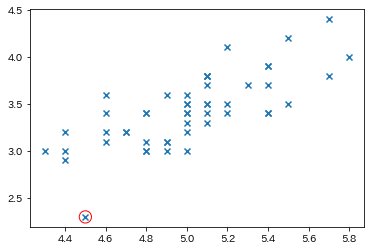

In [17]:
# Plot specifix index datum among all data

specific_outlier_idx = 41

plt.scatter(df_test.iloc[:, 0], df_test.iloc[:, 1], marker = 'x')
plt.scatter(df_test.iloc[specific_outlier_idx, 0], df_test.iloc[specific_outlier_idx, 1], c = 'None', s = 150, edgecolors = 'r')
    
plt.show()